In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
pd.options.display.max_columns = 100

In [2]:
df = pd.read_csv('./model_data/winni_reports.csv', index_col = 0)
df.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time_caught,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,general_loc,duration_min,month,hour,time_caught_bucket
0,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,6:20,salmon,18.0,20.0,False,6:20,9:00,lockes,160.0,8,6,"[5, 7)"
1,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:00,rainbow,16.0,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)"
2,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:15,smallmouth,12.8,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)"
3,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,8:40,salmon,10.0,37.0,False,6:20,9:00,lockes,160.0,8,8,"[7, 9)"
4,2015,2015-08-28,65.0,76.3,8,nw,sunny,north of diamond,7:45,rainbow,16.0,43.0,False,7:15,10:30,diamond,195.0,8,7,"[7, 9)"


In [5]:
## Dummy columns
df = pd.get_dummies(df, columns = ['wind_dir', 'weather', 'general_loc', 'fish_type'], drop_first = True)

In [7]:
# Define X
X = X = df.drop(columns = ['date','fish_length_in', 'time_caught', 'lines_in', 'lines_out', 'location', 'time_caught_bucket'])

# Standard Scalar
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

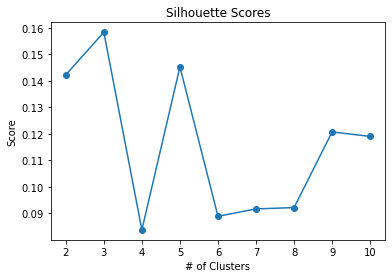

In [9]:
# plot silhouette scores

silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

C:\Users\aorfa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


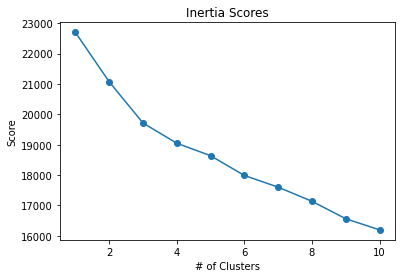

In [10]:
# Elbow plot

inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

In [12]:
# Fit a K-means clustering model
km = KMeans(n_clusters=5, random_state=42)
km.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)